In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr

import plotly.express as px
import os

In [4]:
# import chart_studio
# https://plotly.com/python/getting-started-with-chart-studio/
# chart_studio.tools.set_credentials_file(username='aborowiak', api_key='lr1c37zw81')
# \plotly.tools.set_credentials_file(username='aborowiak', api_key = 'm7GnZNkkt9fbQiEnVgWz')

In [7]:
ROOT_DIR = '/g/data/w40/ab2313/longrunmip'

In [9]:
os.listdir(ROOT_DIR)

['tas_ann_ECHAM5MPIOM_1pct4x_6080.nc']

In [16]:
ech = xr.open_dataset(f'{ROOT_DIR}/tas_ann_ECHAM5MPIOM_1pct4x_6080.nc', use_cftime = True,
                     chunks = {'lat':100,'lon':100,'time':100})

In [17]:
ech

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 96, time: 6080)
Coordinates:
  * lat      (lat) float64 87.16 83.48 79.78 76.07 ... -79.78 -83.48 -87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time     (time) object 2500-12-31 18:00:00 ... 8579-12-31 18:00:00
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(100, 48, 96), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.4.0.1
    Conventions:  CF-1.0
    history:      Thu Apr 14 02:27:05 2016: ncatted -O -a long_name,tas,o,c,N...
    source:       ECHAM5.4
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.4.0.1 (http://www.mpimet.m...
    NCO:          4.0.6

In [25]:
ech.time.values[-5:]

array([cftime.DatetimeGregorian(8575, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(8576, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(8577, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(8578, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(8579, 12, 31, 18, 0, 0, 0)], dtype=object)

In [24]:
ech.time.values[:5]

array([cftime.DatetimeGregorian(2500, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(2501, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(2502, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(2503, 12, 31, 18, 0, 0, 0),
       cftime.DatetimeGregorian(2504, 12, 31, 18, 0, 0, 0)], dtype=object)

In [ ]:
ds = ech.tas
fig = px.imshow(ds, animation_frame='time', zmin=220, zmax=300, color_continuous_scale='RdBu_r')
fig.show()

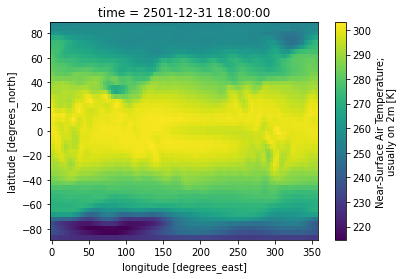

In [18]:
ech.isel(time = 1).tas.plot()

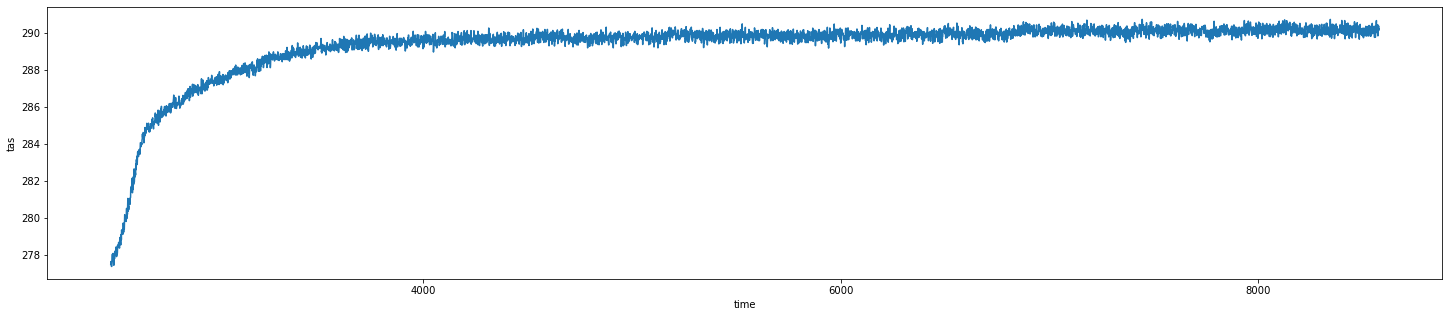

In [23]:
fig, ax = plt.subplots(figsize = (25,5))
ech.mean(dim = ['lat','lon']).tas.plot(ax = ax)

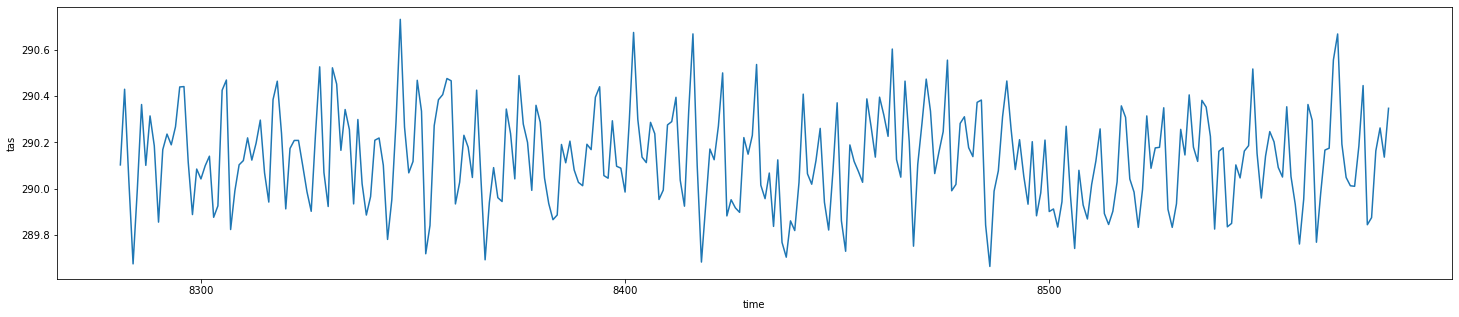

In [29]:
fig, ax = plt.subplots(figsize = (25,5))
ech.isel(time = slice(-300, None)).mean(dim = ['lat','lon']).tas.plot(ax = ax)

# Line Plots

In [30]:
import plotly.graph_objects as go

In [63]:
data = ech.mean(dim = ['lat','lon']).tas.values

fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(len(data)), y =data, mode = 'lines',
                        name = 'Temperature (K)', line = dict(color = 'firebrick', width = 1)))

# fig.update_layout(title = 'GMST (K)', xaxis_title = 'Year', yaxis_title = 'Date')
fig.update_layout(title = 'GMST (K)', xaxis_title = 'Year', yaxis_title = 'Date',
                 xaxis = dict(
                 showline = True, showgrid = True, linecolor = 'rgb(0,204,204)')) # linewidth = 2, ticks = 'outside'
#                 tickfont = dict(family = 'Arial', size = 12,
#                                                                   color = 'rgb(200,0,0)'))


In [75]:
fig = px.imshow(ech.isel(time = 1).tas.values)
fig.show()

Heatmap plot on a spherical map <br>
https://chart-studio.plotly.com/~empet/14813.embed

In [77]:
data = ech.isel(time = 1)
lat = data.lat.values
lon = data.lon.values
tmp = data.tas.values

In [93]:
fig = px.density_mapbox( lat=lat, lon=lon, z=tmp, radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")


Exception: Data must be 1-dimensional

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2015_06_30_precipitation.csv')
df

Hrapx     Hrapy      Lat       Lon  Globvalue
0      272.3333  670.2500  48.4113 -112.8352     0.0875
1     1546.5000  195.1667  18.0057  -65.8040     0.0892
2      262.2500  674.2500  48.6163 -113.4784     0.0908
3      252.5000  674.6667  48.5379 -114.0702     0.0933
4      302.1667  671.4167  48.5843 -111.0188     0.0942
...         ...       ...      ...       ...        ...
9995   606.9167  237.5833  31.8361  -96.4042     1.1867
9996   585.8333  315.9167  34.6539  -96.8080     1.2050
9997   592.1667  311.5833  34.6455  -96.5474     1.2308
9998   594.0000  316.4167  34.5846  -96.4559     1.2383
9999   579.9167  315.3333  34.6366  -97.0703     1.3308

[10000 rows x 5 columns]

In [86]:
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]


In [89]:
fig = go.Figure(data=go.Scattergeo(
    lat = lat,
    lon = lat,
    marker = dict(
        color = tmp,
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 5
        )
    )
))
fig.show()

# Unrleated Plotly Plots

In [44]:
px.line(ech.mean(dim = ['lat','lon']).tas.values,labels = {'x':'Year', 'y':'Temp (K)'},
       title = 'Temp')

In [67]:
df = px.data.gapminder().query('year == 2007')
df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

In [73]:
fig = px.scatter_geo(df, locations = 'iso_alpha', color = 'continent', hover_name = 'country',
                    size = 'pop', projection  = 'orthographic')
fig.show()

In [92]:
df

Hrapx     Hrapy      Lat       Lon  Globvalue
0      272.3333  670.2500  48.4113 -112.8352     0.0875
1     1546.5000  195.1667  18.0057  -65.8040     0.0892
2      262.2500  674.2500  48.6163 -113.4784     0.0908
3      252.5000  674.6667  48.5379 -114.0702     0.0933
4      302.1667  671.4167  48.5843 -111.0188     0.0942
...         ...       ...      ...       ...        ...
9995   606.9167  237.5833  31.8361  -96.4042     1.1867
9996   585.8333  315.9167  34.6539  -96.8080     1.2050
9997   592.1667  311.5833  34.6455  -96.5474     1.2308
9998   594.0000  316.4167  34.5846  -96.4559     1.2383
9999   579.9167  315.3333  34.6366  -97.0703     1.3308

[10000 rows x 5 columns]

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2015_06_30_precipitation.csv')

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = df['Lat'],
    lon = df['Lon'],
    text = df['Globvalue'].astype(str) + ' inches',
    marker = dict(
        color = df['Globvalue'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='US Precipitation 06-30-2015<br>Source: <a href="http://water.weather.gov/precip/">NOAA</a>',
)
fig.show()


In [94]:
ds = xr.tutorial.open_dataset('air_temperature').air[:20]
fig = px.imshow(ds, animation_frame='time', zmin=220, zmax=300, color_continuous_scale='RdBu_r')
fig.show()